In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## SETUP

The function to minimize is:

$(x^2 -1 )\cos(4\pi x)(y^2-1)\cos(2\pi y)$

In [2]:
def f2min(x):
    return (x[0]**2-1)*(x[1]**2-1)*np.cos(4*np.pi*x[0])*np.cos(2*np.pi*x[1])

Visualization:

In [3]:
x = np.linspace(-1.,1.,100)
y = np.linspace(-1.,1.,100)
xx, yy = np.meshgrid(x,y)
zz = f2min([xx,yy])

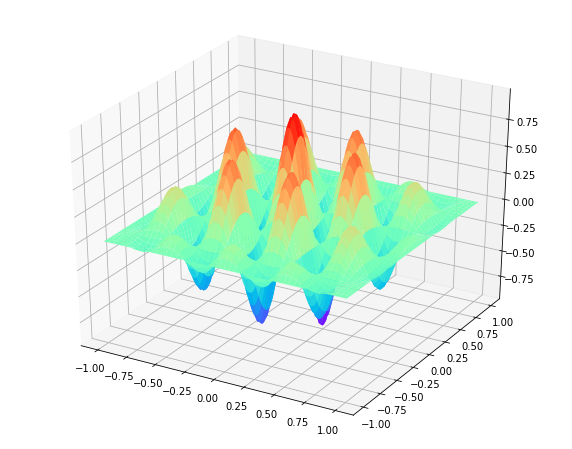

In [4]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax3d = ax.plot_surface(xx,yy,zz, cmap = 'rainbow')

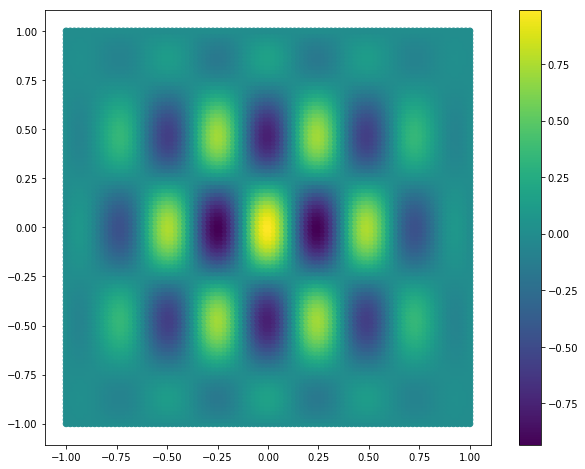

In [5]:
plt.figure(figsize=(10,8))
cb=plt.scatter(xx,yy,c=zz)
plt.colorbar(cb)

## BASIC OPTIMIZERS: scipy.optimize.minimze

#### Nelder-Mead

In [17]:
from scipy.optimize import minimize
x0 = [0.5,0.]
res = minimize(f2min, x0=x0, method='Nelder-Mead')

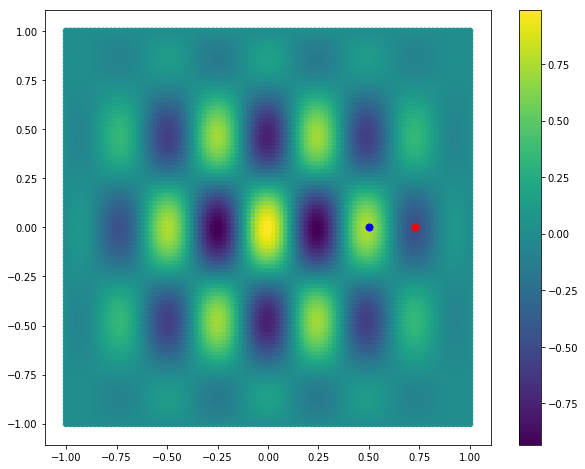

In [18]:
plt.figure(figsize=(10,8))
cb=plt.scatter(xx,yy,c=zz)
plt.scatter(x0[0], x0[1], s=50, c='b')
plt.scatter(res.x[0], res.x[1], s=50, c='r')
plt.colorbar(cb)

Conclusion: lands in the nearest minimum.

#### CG

In [8]:
from scipy.optimize import minimize
x0 = [0.45,0.]
res = minimize(f2min, x0=x0, method='CG')

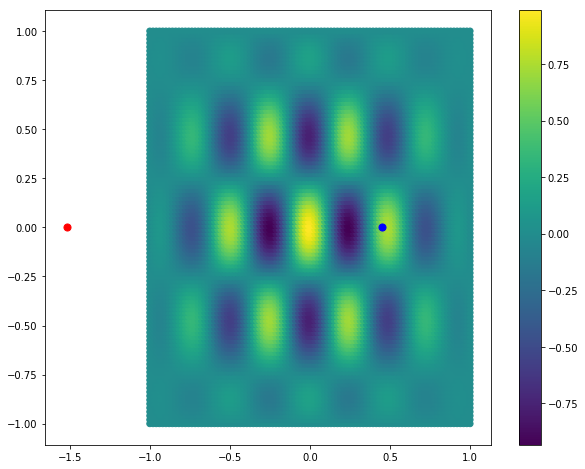

In [9]:
plt.figure(figsize=(10,8))
cb=plt.scatter(xx,yy,c=zz)
plt.scatter(x0[0], x0[1], s=50, c='b', )
plt.scatter(res.x[0], res.x[1], s=50, c='r')
plt.colorbar(cb)

#### L-BFGS-B

In [10]:
from scipy.optimize import minimize
x0 = [0.35,0.25]
res = minimize(f2min, x0=x0, method='L-BFGS-B', bounds=[[-1.,1.],[-1.,1.]])

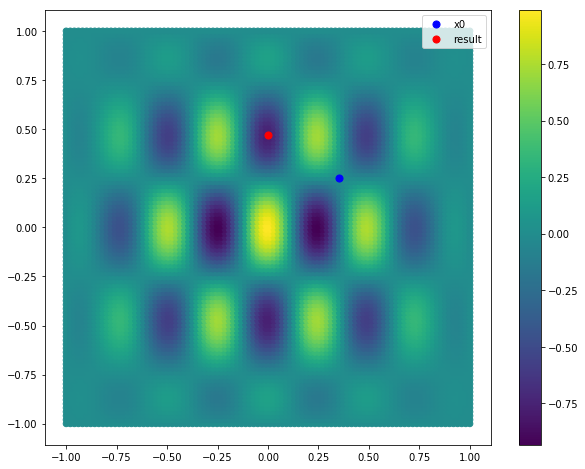

In [11]:
plt.figure(figsize=(10,8))
cb=plt.scatter(xx,yy,c=zz)
plt.scatter(x0[0], x0[1], s=50, c='b', label='x0')
plt.scatter(res.x[0], res.x[1], s=50, c='r', label='result')
plt.colorbar(cb)
plt.legend()

### Conclusion

Simple minimizers can't handle multimodal and degenerate parameter spaces. Will only find **a** global minimum if close enough.

## Differential Evolution

scipy.optimize.differential_evolution promises to find the "global optimim". Let's check it out!

In [12]:
from scipy.optimize import differential_evolution as de
res_de = de(f2min, bounds = [(-1.2,1.2),(-1.2,1.2)])

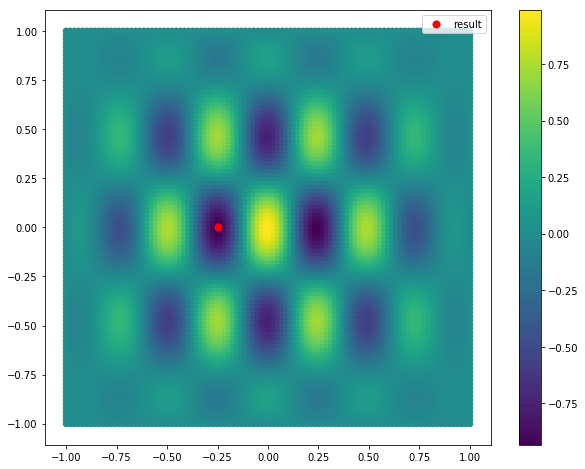

In [13]:
plt.figure(figsize=(10,8))
cb=plt.scatter(xx,yy,c=zz)
plt.scatter(res_de.x[0], res_de.x[1], s=50, c='r', label='result')
plt.colorbar(cb)
plt.legend()

YESSS!!!!

## Potentially interesting: PySwarms

Particle Swarm Optimization (PSO) is based on a swarm intelligence algorithm - can be slow, but worth testing on this model. Typically ok if the function is smooth and has a clear global minimum.

In [14]:
# The function needs to be reformated a little bit to account for the swarm array structure
def f2min_pso(x):
    return (x[:,0]**2-1)*(x[:,1]**2-1)*np.cos(4*np.pi*x[:,0])*np.cos(2*np.pi*x[:,1])

In [15]:
from pyswarms.single.global_best import GlobalBestPSO

# instatiate the optimizer
x_max = 1 * np.ones(2)
x_min = -1 * x_max
bounds = (x_min, x_max)
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=bounds)

# now run the optimization, pass a=1 and b=100 as a tuple assigned to args

cost, pos = optimizer.optimize(f2min_pso, 1000)

2019-08-01 16:04:25,333 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-0.938
2019-08-01 16:04:29,052 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9383317622335815, best pos: [ 2.46675337e-01 -1.61628251e-09]


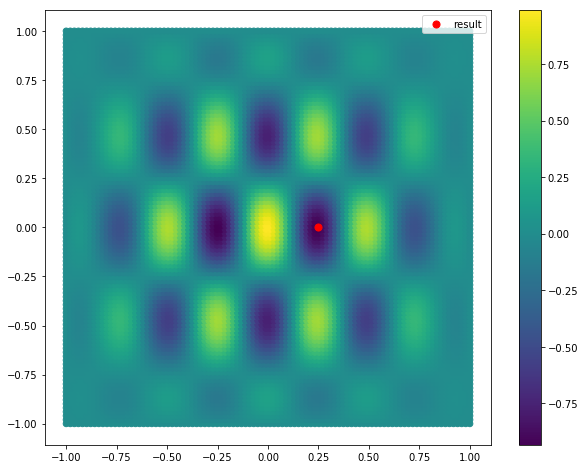

In [16]:
plt.figure(figsize=(10,8))
cb=plt.scatter(xx,yy,c=zz)
plt.scatter(pos[0], pos[1], s=50, c='r', label='result')
plt.colorbar(cb)
plt.legend()

## Conclusion

When modeling cheap and analytical functions with multiple local and global minima, most of the standard minimizers don't perform well. Most likely will land in a local minimum near the starting point.

The two promising ones that we got our hands on are Differential Evolution and Particle Swarm Optimization, both of which will ALWAYS find **a** global minimum.